In [1]:
# Analyze the Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
# Summary statistics
print(data.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

C:\Users\lokes\AppData\Local\Temp\ipykernel_33212\2524898873.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


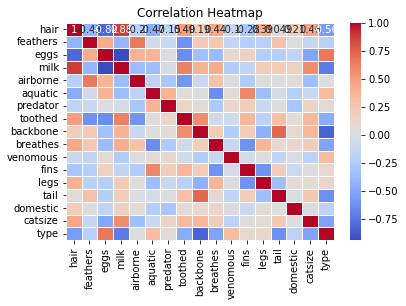

In [4]:
# Visualize pairwise relationships in the dataset
corr = data.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

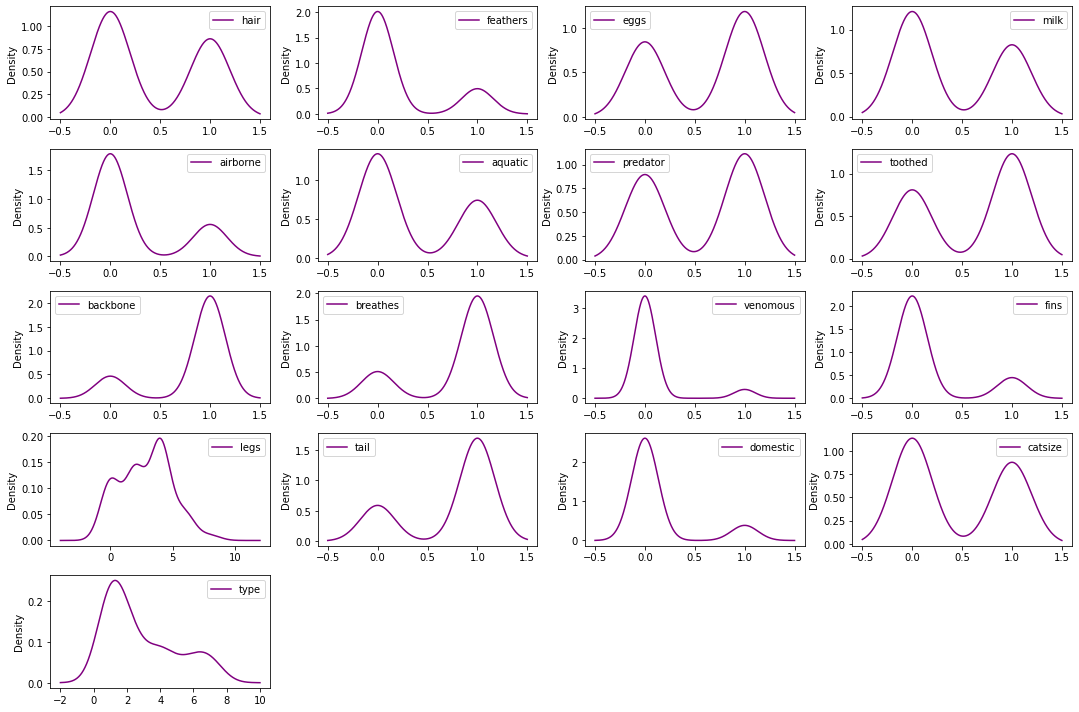

In [13]:
# Visualize the distribution of each feature
data.plot(kind='kde', subplots=True, layout=(5,4),sharex=False, figsize=(15, 10), color='purple')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
print(data.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [15]:
features = data.drop(['type', 'animal name'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
target = data['type']
features_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [16]:
data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
data_scaled['type'] = data['type']
print(data_scaled.head())

       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  type  
0 -0.384353  1.138180     1  
1 -0.384353  1.138180     1  
2 -0.384

In [17]:
# Split the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['type'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        ...,
        [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537],
        [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
         -0.38435306,  1.13818037],
        [ 1.16139451, -0.49690399,  0.84372057, ..., -1.69841555,
         -0.38435306, -0.87859537]]),
 array([[ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
         -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
         -0.87859537],
        [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
         -0.74420841, -1.1155467 ,  0.80977633,  0.465

In [18]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 80
Testing set size: 21


In [19]:
# Implement KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn

KNeighborsClassifier(metric='euclidean')

In [20]:
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [21]:
# Evaluate the Classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-score: 0.9333333333333333


C:\Users\lokes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Visualize Decision Boundaries

import numpy as np
X_train_2D = X_train[:, :2]
X_test_2D = X_test[:, :2]
knn_2D = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2D.fit(X_train_2D, y_train)

KNeighborsClassifier(metric='euclidean')

In [23]:
# Define the mesh grid
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
xx, yy

(array([[-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        ...,
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614],
        [-1.86103386, -1.76103386, -1.66103386, ...,  1.93896614,
          2.03896614,  2.13896614]]),
 array([[-1.49690399, -1.49690399, -1.49690399, ..., -1.49690399,
         -1.49690399, -1.49690399],
        [-1.39690399, -1.39690399, -1.39690399, ..., -1.39690399,
         -1.39690399, -1.39690399],
        [-1.29690399, -1.29690399, -1.29690399, ..., -1.29690399,
         -1.29690399, -1.29690399],
        ...,
        [ 2.80309601,  2.80309601,  2.80309601, ...,  

In [24]:
# Predict on the mesh grid
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

C:\Users\lokes\AppData\Local\Temp\ipykernel_33212\1568350220.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c=y_test, marker='x', edgecolor='k', s=100, cmap='coolwarm')


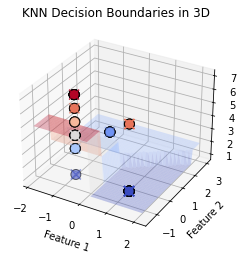

In [28]:
# Plot decision boundaries
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.3)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c=y_train, marker='o', edgecolor='k', s=100, cmap='coolwarm')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c=y_test, marker='x', edgecolor='k', s=100, cmap='coolwarm')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
ax.set_zlabel('Decision Boundary')
plt.title('KNN Decision Boundaries in 3D')
plt.show()

In [ ]:
Interview Questions:
1. What are the key hyperparameters in KNN?
        Hyperparameters in the kNN algorithm refer to aspects such as the number of neighbors (k) 
    considered during classification or regression, the distance metric used, and the weighting scheme
    applied to the data. One approach to selecting suitable hyperparameters involves using techniques
    like cross-validation, grid search, or random search.
2. What distance metrics can be used in KNN?
        Euclidean Distance – This distance is the most widely used one as it is the default metric 
    that SKlearn library of Python uses for K-Nearest Neighbour. It is a measure of the true straight
    line distance between two points in Euclidean space. It can be used by setting the value of p 
    equal to 2 in Minkowski distance metric.